<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Curve-Fitting" data-toc-modified-id="Curve-Fitting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curve Fitting</a></span><ul class="toc-item"><li><span><a href="#Using-linear-regression-for-fitting-non-linear-functions" data-toc-modified-id="Using-linear-regression-for-fitting-non-linear-functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Using linear regression for fitting non-linear functions</a></span><ul class="toc-item"><li><span><a href="#Linear-regression-for-fitting-an-exponential-function" data-toc-modified-id="Linear-regression-for-fitting-an-exponential-function-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Linear regression for fitting an exponential function</a></span></li><li><span><a href="#Linear-regression-for-fitting-a-power-law-function" data-toc-modified-id="Linear-regression-for-fitting-a-power-law-function-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Linear regression for fitting a power-law function</a></span></li></ul></li><li><span><a href="#Nonlinear-fitting" data-toc-modified-id="Nonlinear-fitting-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Nonlinear fitting</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li></ul></div>

python

single: curve fitting

Curve Fitting
=============

One of the most important tasks in any experimental science is modeling
data and determining how well some theoretical function describes
experimental data. In the last chapter, we illustrated how this can be
done when the theoretical function is a simple straight line in the
context of learning about Python functions and methods. Here we show how
this can be done for a arbitrary fitting functions, including linear,
exponential, power law, and other nonlinear fitting functions.

Using linear regression for fitting non-linear functions
--------------------------------------------------------

We can use our results for linear regression with $\chi^2$ weighting
that we developed in Chapter 7 to fit functions that are nonlinear in
the fitting parameters, *provided* we can transform the fitting function
into one that is linear in the fitting parameters and in the independent
variable ($x$).

single: curve fitting; linear; exponential function

### Linear regression for fitting an exponential function

To illustrate this approach, let's consider some experimental data taken
from a radioactive source that was emitting beta particles (electrons).
We notice that the number of electrons emitted per unit time is
decreasing with time. Theory suggests that the number of electrons $N$
emitted per unit time should decay exponentially according to the
equation

$$N(t) = N_0 e^{-t/\tau} \;.$$

This equation is nonlinear in $t$ and in the fitting parameter $\tau$
and thus cannot be fit using the method of the previous chapter.
Fortunately, this is a special case for which the fitting function can
be transformed into a linear form. Doing so will allow us to use the
fitting routine we developed for fitting linear functions.

We begin our analysis by transforming our fitting function to a linear
form. To this end we take the logarithm of Eq. `eq:decay`:

$$\ln N = \ln N_{0} -\frac{t}{\tau} \;.$$

With this tranformation our fitting function is linear in the
independent variable $t$. To make our method work, however, our fitting
function must be linear in the *fitting parameters*, and our transformed
function is still nonlinear in the fitting parameters $\tau$ and $N_0$.
Therefore, we define new fitting parameters as follows

$$\begin{aligned}
a &= \ln N_{0}\\
b &= -1/\tau
\end{aligned}$$

Now if we define a new dependent variable $y = \ln N$, then our fitting
function takes the form of a fitting function that is linear in the
fitting parameters $a$ and $b$

$$y = a + bx$$

where the independent variable is $x=t$ and the dependent variable is
$y=\ln N$.

We are almost ready to fit our transformed fitting function, with
transformed fitting parameters $a$ and $b$, to our transformed
independent and dependent data, $x$ and $y$. The last thing we have to
do is to transform the estimates of the uncertainties $\delta N$ in $N$
to the uncertainties $\delta y$ in $y$ $(= \ln N)$. So how much does a
given uncertainty in $N$ translate into an uncertainty in $y$? In most
cases, the uncertainty in $y$ is much smaller than $y$, *i.e.*
$\delta y \ll y$; similarly $\delta N \ll N$. In this limit we can use
differentials to figure out the relationship between these
uncertainties. Here is how it works for this example:

$$\begin{aligned}
y &= \ln N\\
\delta y &= \left|\frac{\partial y}{\partial N}\right|\delta N\\
\delta y &= \frac{\delta N} {N} \;.
\end{aligned}$$

Equation `eq:sigmaLnN` tells us how a small change $\delta N$ in $N$
produces a small change $\delta y$ in $y$. Here we identify the
differentials $dy$ and $dN$ with the uncertainties $\delta y$ and
$\delta N$. Therefore, an uncertainty of $\delta N$ in $N$ corresponds,
or translates, to an uncertainty $\delta y$ in $y$.

Let's summarize what we have done so far. We started with the some data
points $\{t_i,N_i\}$ and some addition data $\{\delta N_i\}$ where each
datum $\delta N_i$ corresponds to the uncertainty in the experimentally
measured $N_i$. We wish to fit these data to the fitting function

$$N(t) = N_0 e^{-t/\tau} \;.$$

We then take the natural logarithm of both sides and obtain the linear
equation

$$\begin{aligned}
\ln N &= \ln N_{0} -\frac{t}{\tau} \\
y &= a + bx
\end{aligned}$$

with the obvious correspondences

$$\begin{aligned}
x &= t\\
y &= \ln N\\
a &= \ln N_{0}\\
b &= -1/\tau
\end{aligned}$$

Now we can use the linear regression routine with $\chi^2$ weighting
that we developed in the previous section to fit `eq:TransformedSemilog`
to the transformed data $x_i (= t_i)$ and $y_i (= \ln N_i)$. The inputs
are the tranformed data ${x_i}, {y_i}, {\delta y_i}$. The outputs are
the fitting parameters $a$ and $b$, as well as the estimates of their
uncertainties $\delta a$ and $\delta b$ along with the value of
$\chi^2$. You can obtain the values of the original fitting parameters
$N_0$ and $\tau$ by taking the differentials of the last two equations
in Eq. `eq:eqlist`:

$$\begin{aligned}
\delta a &= \left|\frac{\partial a}{\partial N_0}\right|\delta N_0 
          = \frac{\delta N_{0}}{N_{0}}\\
\delta b &= \left|\frac{\partial b}{\partial \tau}\right|\delta \tau
          = \frac{\delta \tau}{\tau^2}
\end{aligned}$$

The Python routine below shows how to implement all of this for a set of
experimental data that is read in from a data file.

Figure `8.1 <fig:betaDecay>` shows the output of the fit to simulated
beta decay data obtained using the program below. Note that the error
bars are large when the number of counts $N$ are small. This is
consistent with what is known as *shot noise* (noise that arises from
counting discrete events), which obeys *Poisson* statistics. You will
study sources of noise, including shot noise, later in your lab courses.
The program also prints out the fitting parameters of the transformed
data as well as the fitting parameters for the exponential fitting
function.

<figure>
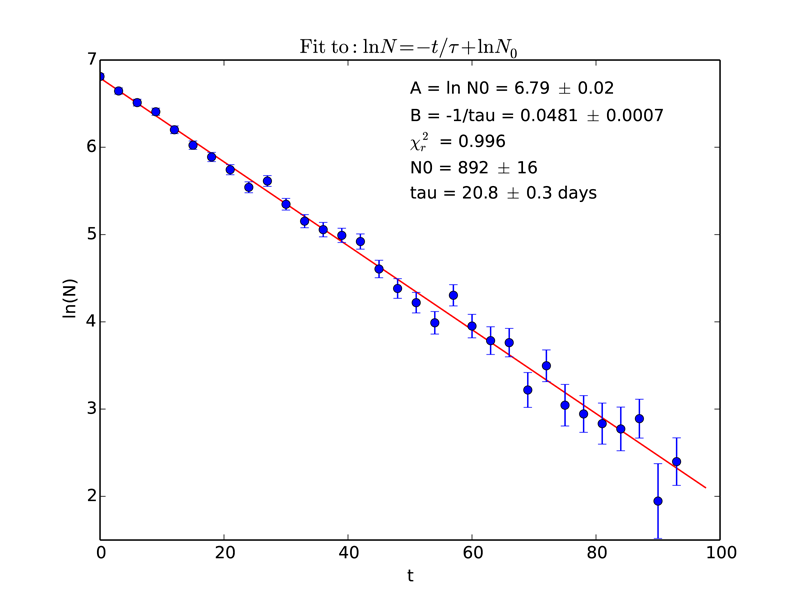<figcaption>Semi-log plot of beta decay measurements from Phosphorus-32.</figcaption>
</figure>

``` python
import numpy as np
import matplotlib.pyplot as plt

def LineFitWt(x, y, sig):
    """ 
    Fit to straight line.
    Inputs: x and y arrays and uncertainty array (unc) for y data.
    Ouputs: slope and y-intercept of best fit to data.
    """
    sig2 = sig**2
    norm = (1./sig2).sum()
    xhat = (x/sig2).sum() / norm
    yhat = (y/sig2).sum() / norm
    slope = ((x-xhat)*y/sig2).sum()/((x-xhat)*x/sig2).sum()
    yint = yhat - slope*xhat
    sig2_slope = 1./((x-xhat)*x/sig2).sum()
    sig2_yint = sig2_slope * (x*x/sig2).sum() / norm
    return slope, yint, np.sqrt(sig2_slope), np.sqrt(sig2_yint)

def redchisq(x, y, dy, slope, yint):
    chisq = (((y-yint-slope*x)/dy)**2).sum()
    return chisq/float(x.size-2)

# Read data from data file
t, N, dN = np.loadtxt("betaDecay.txt", skiprows=2, unpack=True)

########## Code to tranform & fit data starts here ##########

# Transform data and parameters to linear form: Y = A + B*X
X = t         # transform t data for fitting (trivial)
Y = np.log(N) # transform N data for fitting
dY = dN/N     # transform uncertainties for fitting

# Fit transformed data X, Y, dY to obtain fitting parameters A & B
# Also returns uncertainties in A and B
B, A, dB, dA = LineFitWt(X, Y, dY)
# Return reduced chi-squared
redchisqr = redchisq(X, Y, dY, B, A)

# Determine fitting parameters for original exponential function
# N = N0 exp(-t/tau) ...
N0 = np.exp(A)
tau = -1.0/B
# ... and their uncertainties
dN0 = N0 * dA
dtau = tau**2 * dB

####### Code to plot transformed data and fit starts here #######

# Create line corresponding to fit using fitting parameters
# Only two points are needed to specify a straight line
Xext = 0.05*(X.max()-X.min())
Xfit = np.array([X.min()-Xext, X.max()+Xext])
Yfit = A + B*Xfit

plt.errorbar(X, Y, dY, fmt="bo")
plt.plot(Xfit, Yfit, "r-", zorder=-1)
plt.xlim(0, 100)
plt.ylim(1.5, 7)
plt.title("$\mathrm{Fit\\ to:}\\ \ln N = -t/\\tau + \ln N_0$")
plt.xlabel("t")
plt.ylabel("ln(N)")

plt.text(50, 6.6, "A = ln N0 = {0:0.2f} $\pm$ {1:0.2f}"
         .format(A, dA))
plt.text(50, 6.3, "B = -1/tau = {0:0.4f} $\pm$ {1:0.4f}"
         .format(-B, dB))
plt.text(50, 6.0, "$\chi_r^2$ = {0:0.3f}"
         .format(redchisqr))

plt.text(50, 5.7, "N0 = {0:0.0f} $\pm$ {1:0.0f}"
         .format(N0, dN0))
plt.text(50, 5.4, "tau = {0:0.1f} $\pm$ {1:0.1f} days"
         .format(tau, dtau))

plt.show()
```

single: curve fitting; linear; power law function

single: curve fitting; linear; power-law function

### Linear regression for fitting a power-law function

You can use a similar approach to the one outlined above to fit
experimental data to a power law fitting function of the form

$$P(s) = P_0 s^\alpha \;.$$

We follow the same approach we used for the exponential fitting function
and first take the logarithm of both sides of `eq:pwrlaw`

$$\ln P = \ln P_0 + \alpha \ln s \;.$$

We recast this in the form of a linear equation $y = a + bx$ with the
following identifications:

$$\begin{aligned}
x &= \ln s\\
y &= \ln P\\
a &= \ln P_{0}\\
b &= \alpha
\end{aligned}$$

Following a procedure similar to that used to fit using an exponential
fitting function, you can use the tranformations given by
`eq:eqPwrTrans` as the basis for a program to fit a power-law fitting
function such as `eq:logpwrlaw` to experimental data.

single: curve fitting; nonlinear

Nonlinear fitting
-----------------

The method introduced in the previous section for fitting nonlinear
fitting functions can be used only if the fitting function can be
transformed into a fitting function that is linear in the fitting
parameters $a$, $b$, $c$... When we have a nonlinear fitting function
that cannot be transformed into a linear form, we need another approach.

The problem of finding values of the fitting parameters that minimize
$\chi^2$ is a nonlinear optimization problem to which there is quite
generally no analytical solution (in contrast to the linear optimization
problem). We can gain some insight into this nonlinear optimization
problem, namely the fitting of a nonlinear fitting function to a data
set, by considering a fitting function with only two fitting parameters.
That is, we are trying to fit some data set $\{x_{i},y_{i}\}$, with
uncertainties in $\{y_{i}\}$ of $\{\sigma_{i}\}$, to a fitting function
is $f(x;a,b)$ where $a$ and $b$ are the two fitting parameters. To do
so, we look for the minimum in

$$\chi^2(a,b) = \sum_{i} \left(\frac{y_{i} - f(x_{i})}{\sigma_{i}}\right)^2 \;.$$

Note that once the data set, uncertainties, and fitting function are
specified, $\chi^2(a,b)$ is simply a function of $a$ and $b$. We can
picture the function $\chi^2(a,b)$ as a of landscape with peaks and
valleys: as we vary $a$ and $b$, $\chi^2(a,b)$ rises and falls. The
basic idea of all nonlinear fitting routines is to start with some
initial guesses for the fitting parameters, here $a$ and $b$, and by
scanning the $\chi^2(a,b)$ landscape, find values of $a$ and $b$ that
minimize $\chi^2(a,b)$.

There are a number of different methods for trying to find the minimum
in $\chi^2$ for nonlinear fitting problems. Nevertheless, the method
that is most widely used goes by the name of the *Levenberg-Marquardt*
method. Actually the Levenberg-Marquardt method is a combination of two
other methods, the *steepest descent* (or gradient) method and
*parabolic extrapolation*. Roughly speaking, when the values of $a$ and
$b$ are not too near their optimal values, the gradient descent method
determines in which direction in $(a,b)$-space the function
$\chi^2(a,b)$ decreases most quickly---the direction of steepest
descent---and then changes $a$ and $b$ accordingly to move in that
direction. This method is very efficient unless $a$ and $b$ are very
near their optimal values. Near the optimal values of $a$ and $b$,
parabolic extrapolation is more efficient. Therefore, as $a$ and $b$
approach their optimal values, the Levenberg-Marquardt method gradually
changes to the parabolic extrapolation method, which approximates
$\chi^2(a,b)$ by a Taylor series second order in $a$ and $b$ and then
computes directly the analytical minimum of the Taylor series
approximation of $\chi^2(a,b)$. This method is only good if the second
order Taylor series provides a good approximation of $\chi^2(a,b)$. That
is why parabolic extrapolation only works well very near the minimum in
$\chi^2(a,b)$.

Before illustrating the Levenberg-Marquardt method, we make one
important cautionary remark: the Levenberg-Marquardt method can fail if
the initial guesses of the fitting parameters are too far away from the
desired solution. This problem becomes more serious the greater the
number of fitting parameters. Thus it is important to provide reasonable
initial guesses for the fitting parameters. Usually, this is not a
problem, as it is clear from the physical situation of a particular
experiment what reasonable values of the fitting parameters are. But
beware!

single: SciPy; nonlinear curve fitting

The `scipy.optimize` module provides routines that implement the
Levenberg-Marquardt non-linear fitting method. One is called
`scipy.optimize.leastsq`. A somewhat more user-friendly version of the
same method is accessed through another routine in the same
`scipy.optimize` module: it's called `scipy.optimize.curve_fit` and it
is the one we demonstrate here. The function call is :

    import scipy.optimize
    [... insert code here ...]
    scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, 
                             **kwargs)

The arguments of `curve_fit` are

> -   `f(xdata, a, b, ...)`: is the fitting function where `xdata` is
>     the data for the independent variable and `a, b, ...` are the
>     fitting parameters, however many there are, listed as separate
>     arguments. Obviously, `f(xdata, a, b, ...)` should return the $y$
>     value of the fitting function.
> -   `xdata`: is the array containing the $x$ data.
> -   `ydata`: is the array containing the $y$ data.
> -   `p0`: is a tuple containing the initial guesses for the fitting
>     parameters. The guesses for the fitting parameters are set equal
>     to 1 if they are left unspecified. It is almost always a good idea
>     to specify the initial guesses for the fitting parameters.
> -   `sigma`: is the array containing the uncertainties in the $y$
>     data.
> -   `**kwargs`: are keyword arguments that can be passed to the
>     fitting routine `scipy.optimize.leastsq` that `curve_fit` calls.
>     These are usually left unspecified.

We demonstrate the use of `curve_fit` to fit the data plotted in the
figure below:

<figure>
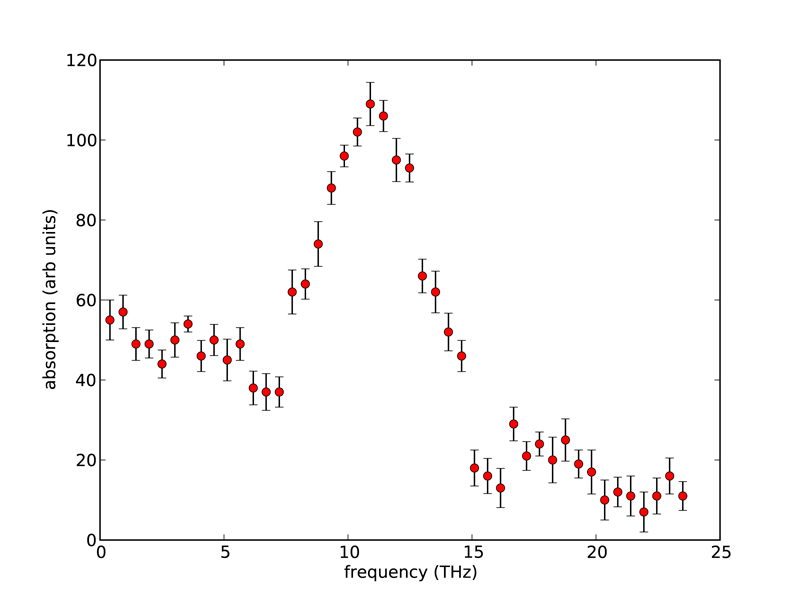
</figure>

We model the data with the fitting function that consists of a quadratic
polynomial background with a Gaussian peak:

$$A(f) = a + bf + cf^2 + P e^{-\frac{1}{2}[(f-f_p)/f_w]^2} .$$

Lines 7 and 8 define the fitting functions. Note that the independent
variable `f` is the first argument, which is followed by the six fitting
parameters $a$, $b$, $c$, $P$, $f_p$, and $f_w$.

To fit the data with $A(f)$, we need good estimates of the fitting
parameters. Setting $f=0$, we see that $a \approx 60$. An estimate of
the slope of the baseline gives $b \approx -60/20=-3$. The curvature in
the baseline is small so we take $c \approx 0$. The amplitude of the
peak above the baseline is $P \approx 110-30=80$. The peak is centered
at $f_p \approx 11$, while width of peak is about $f_w \approx 2$. We
use these estimates to set the initial guesses of the fitting parameters
in lines 14 and 15 in the code below.

single: list comprehension

The function that performs the Levenverg-Marquardt algorithm, <span
class="title-ref">scipy.optimize.curve\_fit</span>, is called in lines
19-20 with the output set equal to the one and two-dimensional arrays
`nlfit` and `nlpcov`, respectively. The array `nlfit`, which gives the
optimal values of the fitting parameters, is unpacked in line 23. The
square root of the diagonal of the two-dimensional array `nlpcov`, which
gives the estimates of the uncertainties in the fitting parameters, is
unpacked in lines 26-27 using a list comprehension.

The rest of the code plots the data, the fitting function using the
optimal values of the fitting parameters found by
`scipy.optimize.curve_fit`, and the values of the fitting parameters and
their uncertainties.

``` python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec  # for unequal plot boxes
import scipy.optimize

# define fitting function
def GaussPolyBase(f, a, b, c, P, fp, fw):
    return a + b*f + c*f*f + P*np.exp(-0.5*((f-fp)/fw)**2)

# read in spectrum from data file
# f=frequency, s=signal, ds=s uncertainty
f, s, ds = np.loadtxt("Spectrum.txt", skiprows=4, unpack=True)

# initial guesses for fitting parameters
a0, b0, c0 = 60., -3., 0.
P0, fp0, fw0 = 80., 11., 2.

# fit data using SciPy's Levenberg-Marquart method
nlfit, nlpcov = scipy.optimize.curve_fit(GaussPolyBase, 
                f, s, p0=[a0, b0, c0, P0, fp0, fw0], sigma=ds)

# unpack fitting parameters
a, b, c, P, fp, fw = nlfit
# unpack uncertainties in fitting parameters from diagonal
# of covariance matrix
da, db, dc, dP, dfp, dfw = \
          [np.sqrt(nlpcov[j,j]) for j in range(nlfit.size)]

# create fitting function from fitted parameters
f_fit = np.linspace(0.0, 25., 128)
s_fit = GaussPolyBase(f_fit, a, b, c, P, fp, fw)

# Calculate residuals and reduced chi squared
resids = s - GaussPolyBase(f, a, b, c, P, fp, fw)
redchisqr = ((resids/ds)**2).sum()/float(f.size-6)

# Create figure window to plot data
fig = plt.figure(1, figsize=(8,8))
gs = gridspec.GridSpec(2, 1, height_ratios=[6, 2])

# Top plot: data and fit
ax1 = fig.add_subplot(gs[0])
ax1.plot(f_fit, s_fit)
ax1.errorbar(f, s, yerr=ds, fmt='or', ecolor='black')
ax1.set_xlabel('frequency (THz)')
ax1.set_ylabel('absorption (arb units)')
ax1.text(0.7, 0.95, 'a = {0:0.1f}$\pm${1:0.1f}'
         .format(a, da), transform = ax1.transAxes)
ax1.text(0.7, 0.90, 'b = {0:0.2f}$\pm${1:0.2f}'
         .format(b, db), transform = ax1.transAxes)
ax1.text(0.7, 0.85, 'c = {0:0.2f}$\pm${1:0.2f}'
         .format(c, dc), transform = ax1.transAxes)
ax1.text(0.7, 0.80, 'P = {0:0.1f}$\pm${1:0.1f}'
         .format(P, dP), transform = ax1.transAxes)
ax1.text(0.7, 0.75, 'fp = {0:0.1f}$\pm${1:0.1f}'
         .format(fp, dfp), transform = ax1.transAxes)
ax1.text(0.7, 0.70, 'fw = {0:0.1f}$\pm${1:0.1f}'
         .format(fw, dfw), transform = ax1.transAxes)
ax1.text(0.7, 0.60, '$\chi_r^2$ = {0:0.2f}'
         .format(redchisqr),transform = ax1.transAxes)
ax1.set_title('$s(f) = a+bf+cf^2+P\,e^{-(f-f_p)^2/2f_w^2}$')

# Bottom plot: residuals
ax2 = fig.add_subplot(gs[1])
ax2.errorbar(f, resids, yerr = ds, ecolor="black", fmt="ro")
ax2.axhline(color="gray", zorder=-1)
ax2.set_xlabel('frequency (THz)')
ax2.set_ylabel('residuals')
ax2.set_ylim(-20, 20)
ax2.set_yticks((-20, 0, 20))

plt.show()
```

The above code also plots the difference between the data and fit, known
as the *residuals* in the subplot below the plot of the data and fit.
Plotting the residuals in this way gives a graphical representation of
the goodness of the fit. To the extent that the residuals vary randomly
about zero and do not show any overall upward or downward curvature, or
any long wavelength oscillations, the fit would seem to be a good fit.

<figure>
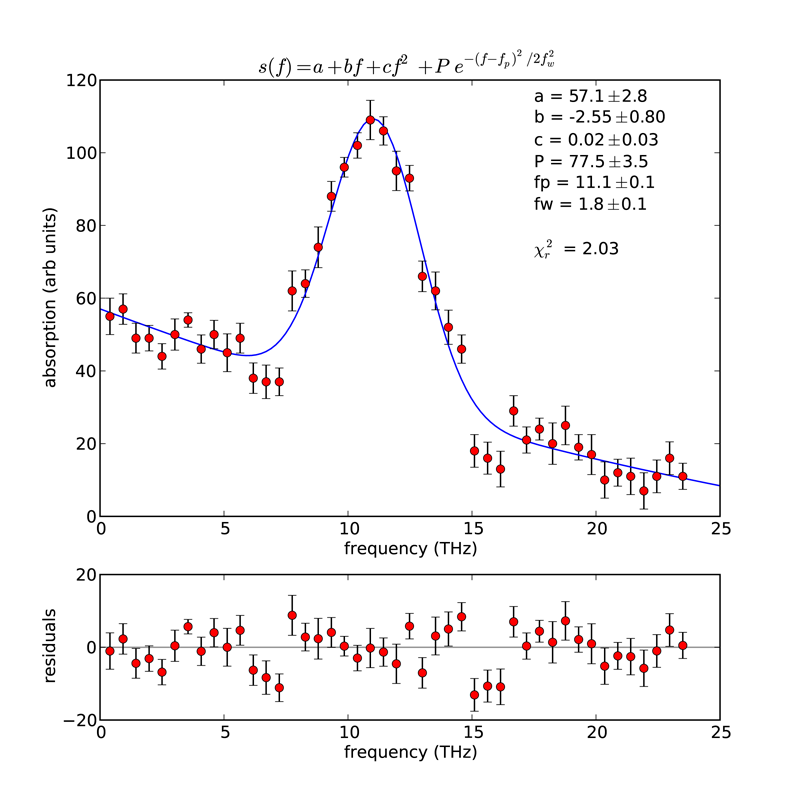<figcaption>Fit to Gaussian with quadratic polynomial background.</figcaption>
</figure>

Finally, we note that we have used the MatPlotLib package `gridspec` to
create the two subplots with different heights. The `gridspec` are made
in lines 3 (where the package is imported), 36 (where 2 rows and 1
column are specified with relative heights of 6 to 2), 39 (where the
first `gs[0]` height is specified), and 54 (where the second `gs[1]`
height is specified). More details about the `gridspec` package can be
found at the MatPlotLib web site.

Exercises
---------

1.  When a voltage source is connected across a resistor and inductor in
    series, the voltage across the inductor $V_i(t)$ is predicted to
    obey the equation

    $$V(t) = V_0 e^{-\Gamma t}$$

    where $t$ is the time and the decay rate $\Gamma=R/L$ is the ratio
    of the resistance $R$ to the inductance $L$ of the circuit. In this
    problem, you are to write a Python routine that fits the above
    equation to the data below for the voltage measured across an
    inductor after it is connected in series with a resistor to a
    voltage source. Following the example in the text, linearize the
    `eq:inductorDecay` and use a linear fitting routine, either the one
    you wrote from the previous chapter or one from NumPy or SciPy.

    1.  Find the best values of $\Gamma$ and $V_0$ and the uncertainties
        in their values $\sigma_\Gamma$ and $\sigma_{V_0}$.

    2.  Find the value of $\chi_r^2$ for your fit. Does it make sense?

    3.  Make a semi-log plot of the data using symbols with error bars
        (no line) and of the fit (line only). The fit should appear as a
        straight line that goes through the data points.

    4.  If the resistor has a value of 10.0 $\mathrm{k}\Omega$, what is
        the value of the inductance and its uncertainty according to
        your fit, assuming that the error in the resistance is
        negligibly small.

            Data for decay of voltage across an inductor
            in an RL circuit
            Date: 24-Oct-2012
            Data taken by D. M. Blantogg and T. P. Chaitor

            time (ns)   voltage (volts)  uncertainty (volts)
                0.0        5.08e+00        1.12e-01
               32.8        3.29e+00        9.04e-02
               65.6        2.23e+00        7.43e-02
               98.4        1.48e+00        6.05e-02
              131.2        1.11e+00        5.25e-02
              164.0        6.44e-01        4.00e-02
              196.8        4.76e-01        3.43e-02
              229.6        2.73e-01        2.60e-02
              262.4        1.88e-01        2.16e-02
              295.2        1.41e-01        1.87e-02
              328.0        9.42e-02        1.53e-02
              360.8        7.68e-02        1.38e-02
              393.6        3.22e-02        8.94e-03
              426.4        3.22e-02        8.94e-03
              459.2        1.98e-02        7.01e-03
              492.0        1.98e-02        7.01e-03

2.  Small nanoparticles of soot suspended in water start to aggregate
    when salt is added. The average radius $r$ of the aggregates is
    predicted to grow as a power law in time $t$ according to the
    equation $r = r_0t^n$. Taking the logarithm of this equation gives
    $\ln r = n\ln t + \ln r_0$. Thus the data should fall on a straight
    line if $\ln r$ is plotted *vs* $\ln t$.

    1.  Plot the data below on a graph of $\ln r$ *vs* $\ln t$ to see if
        the data fall approximately on a straight line.

            Size of growing aggregate
            Date: 19-Nov-2013
            Data taken by M. D. Gryart and M. L. Waites
            time (m)   size (nm)    unc (nm)
              0.12        115         10
              0.18        130         12
              0.42        202         14
              0.90        335         18
              2.10        510         20
              6.00        890         30
             18.00       1700         40
             42.00       2600         50

    2.  Defining $y = \ln r$ and $x = \ln t$, use the linear fitting
        routine you wrote for the previous problem to fit the data and
        find the optimal values for the slope and $y$ intercept, as well
        as their uncertainties. Use these fitted values to find the
        optimal values of the the amplitude $r_0$ and the power $n$ in
        the fitting function $r = r_0t^n$. What are the fitted values of
        $r_0$ and $n$? What is the value of $\chi_r^2$? Does a power law
        provide an adequate model for the data?

3.  In this problem you explore using a non-linear least square fitting
    routine to fit the data shown in the figure below. The data,
    including the uncertainties in the $y$ values, are provided in the
    table below. Your task is to fit the function

    $$d(t) = A (1+B\,\cos\omega t) e^{-t^2/2\tau^2} + C$$

    to the data, where the fitting parameters are $A$, $B$, $C$,
    $\omega$, and $\tau$.

    <figure>
    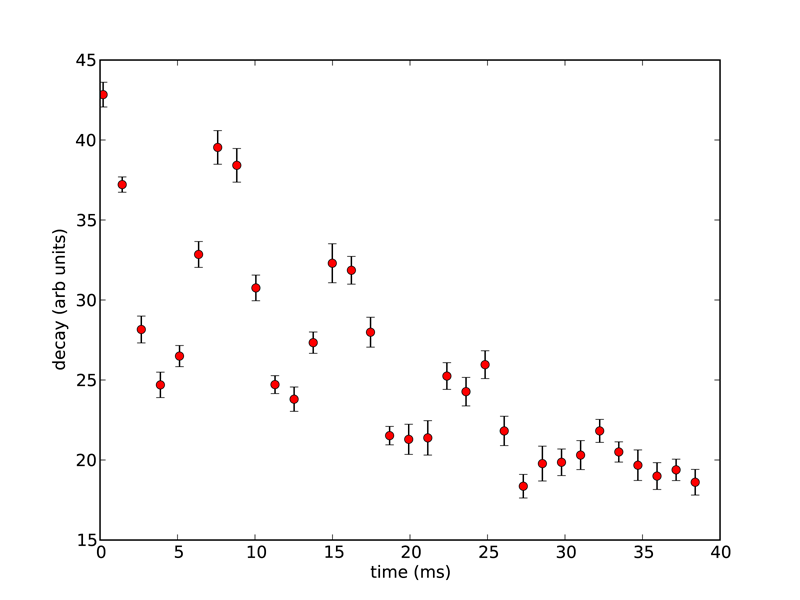
    </figure>

    1.  Write a Python program that (*i*) reads the data in from a data
        file, (*ii*) defines a function
        `oscDecay(t, A, B, C, tau, omega)` for the function $d(t)$
        above, and (*iii*) produces a plot of the data and the function
        $d(t)$. Choose the fitting parameters `A`, `B`, `C`, `tau`, and
        `omega` to produce an approximate fit "by eye" to the data. You
        should be able estimate reasonable values for these parameters
        just by looking at the data and thinking about the behavior of
        $d(t)$. For example, $d(0)=A(1+B)+C$ while $d(\infty)=C$. What
        parameter in $d(t)$ controls the period of the peaks observed in
        the data? Use that information to estimate the value of that
        parameter.

    2.  Following the example in section `sec:nonlinfit`, write a
        program using the SciPy function `scipy.optimize.curve_fit` to
        fit Eq. `eq:OscDecay` to the data and thus find the optimal
        values of the fitting parameters $A$, $B$, $C$, $\omega$, and
        $\tau$. Your program should plot the data along with the fitting
        function using the optimal values of the fitting parameters.
        Write a function to calculate the reduced $\chi^2$. Print out
        the value of the reduced $\chi^2$ on your plot along with the
        optimal values of the fitting parameters. You can use the
        results from part (a) to estimate good starting values of the
        fitting parameters

    3.  Once you have found the optimal fitting parameters, run your
        fitting program again using for starting values the optimal
        values of the fitting parameters $A$, $B$, $C$, and $\tau$, but
        set the starting value of $\omega$ to be 3 times the optimal
        value. You should find that the program converges to a different
        set of fitting parameters than the ones you found in part (b).
        Using the program you wrote for part (b) make a plot of the data
        and the fit like the one you did for part (a). The fit should be
        noticeably worse. What is the value of the reduced $\chi^2$ for
        this fit; it should be much larger than the one you found for
        part (c). The program has found a local minimum in
        $\chi^2$---one that is obviously is not the best fit!

    4.  Setting the fitting parameters $A$, $B$, $C$, and $\tau$ to the
        optimal values you found in part (b), plot $\chi_r^2$ as a
        function of $\omega$ for $\omega$ spanning the range from 0.05
        to 3.95. You should observe several local minima for different
        values of $\chi_r^2$; the global minimum in $\chi_r^2$ should
        occur for the optimal value of $\omega$ you found in part (b).

            Data for absorption spectrum
            Date: 21-Nov-2012
            Data taken by P. Dubson and M. Sparks
            time (ms)  signal  uncertainty
              0.2      41.1       0.9 
              1.4      37.2       0.9 
              2.7      28.3       0.9 
              3.9      24.8       1.1 
              5.1      27.8       0.8 
              6.4      34.5       0.7 
              7.6      39.0       0.9 
              8.8      37.7       0.8 
             10.1      29.8       0.9 
             11.3      22.2       0.7 
             12.5      22.3       0.6 
             13.8      26.7       1.1 
             15.0      30.4       0.7 
             16.2      32.6       0.8 
             17.5      28.9       0.8 
             18.7      22.9       1.3 
             19.9      21.7       0.9 
             21.1      22.1       1.0 
             22.4      22.3       1.0 
             23.6      26.3       1.0 
             24.8      26.2       0.8 
             26.1      21.4       0.9 
             27.3      20.0       1.0 
             28.5      20.1       1.2 
             29.8      21.2       0.5 
             31.0      22.0       0.9 
             32.2      21.6       0.7 
             33.5      21.0       0.7 
             34.7      19.7       0.9 
             35.9      17.9       0.9 
             37.2      18.1       0.8 
             38.4      18.9       1.1 